# Распределение Фишера
# An F continuous random variable

Справка: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.f.html#scipy.stats.f

Импортируем библиотеки

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [282]:
x = np.linspace(start=10**(-10), stop=7, num=100) # num - количество элементов массива, по умолчанию равен 50
# Возвращает массив чисел равномерно распределенных от начального до конечного значения.

Задаем степени свободы и создаем объект распределения

In [283]:
df1, df2 = 3, 7
f_rv = stats.f(df1, df2)
f_rv

Генерируем эмпирическое распределение объема v

In [284]:
v = 1000
f_sample = f_rv.rvs(v)
f_sample

array([  2.65268604e+00,   5.50924294e+00,   8.59285818e-02,
         1.03411529e+01,   2.61560389e+00,   4.59847571e+00,
         9.01204130e-02,   9.80614814e+00,   6.74403022e-01,
         2.79850990e+00,   1.37585151e+00,   3.57549102e-01,
         4.38916582e-01,   2.63107681e+00,   6.88101615e-02,
         4.94439450e-01,   3.39917301e-01,   6.85472012e-01,
         6.49322385e+00,   7.87073207e-01,   5.00624208e+00,
         2.63911172e+00,   1.83870139e+00,   2.87645608e+00,
         1.58610153e+00,   1.26733862e-01,   1.25038477e-01,
         1.44532355e-01,   6.96531736e-01,   1.04808448e+00,
         6.82038457e-01,   1.73017170e+00,   1.10470208e+00,
         7.43789998e-01,   2.06253474e+00,   1.57495730e+00,
         1.65932915e+00,   2.27586178e+00,   3.62227019e-01,
         3.57311668e-01,   8.75277597e-02,   6.72686185e-01,
         8.39479698e-02,   8.99114411e-01,   3.26983836e-01,
         4.84827842e-01,   1.28597721e+00,   7.79948287e+00,
         2.30879706e-01,

Строим гистограмму эмпирического распределения

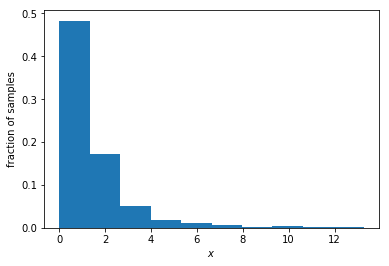

In [285]:
plt.hist(f_sample, normed=True) # Параметр bins - число столбцов
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Смотрим на теоретическую плотность распределения

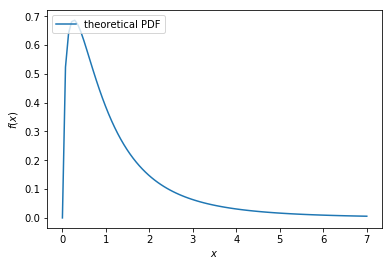

In [287]:
pdf = f_rv.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Совмещаем гистограмму и теоретическую плотность распределения на одном графике

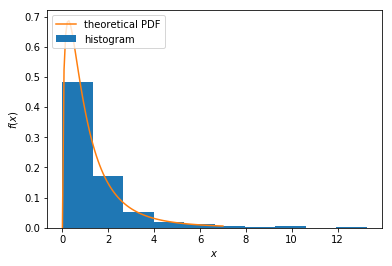

In [289]:
plt.hist(f_sample, normed=True, label='histogram') # Параметр bins - число столбцов, normed=True - сведение величин к одному масштабу
pdf = f_rv.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Считаем параметры изучаемого теоретического распределения Фишера

In [290]:
# Теоретическое среднее распределения Фишера = df2 / (df2 - 2)
mean = f_rv.mean()
mean = df2 / (df2 - 2)
mean

1.4

In [291]:
# Теоретическое стандартное отклонение распределения Фишера
std = f_rv.std()
std = (2 * df2 ** 2 * (df1 + df2 - 2) / (df1 * (df2 - 2) ** 2 * (df2 - 4))) ** (1 / 2)
std

1.8666666666666667

Строим <b>гистограммы распределения выборочных средних</b> при заданном объеме выборки.
Поверх данных гистограмм строим график плотности теоретического нормального распределения,
к которому приближается распределение выборочных средних.

In [292]:
k = 1000 # Количество генераций эмпирической выборки распределения выборочных средних

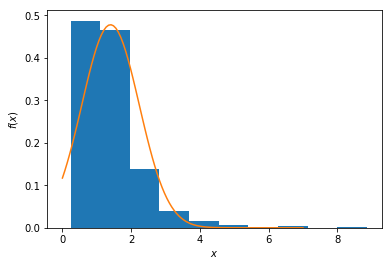

In [293]:
n = 5 # Объем выборки
sampleMean = [] # Массив выборочных средних
for i in range(k):
    f_sample = f_rv.rvs(n)
    sampleMean.append(np.mean(f_sample))
plt.hist(sampleMean, normed=True, label='fraction of samples') # Параметр bins - число столбцов
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
n_mean = mean # Оценка среднего теоретического нормального распределения, к которому приближается распределение выборочных средних
n_std = std / n ** (1/2) # Оценка стандартного отклонения теоретического нормального распределения, к которому приближается распределение выборочных средних
norm_rv = stats.norm(n_mean, n_std)
norm_pdf = norm_rv.pdf(x)
plt.plot(x, norm_pdf, label='normal distribution')

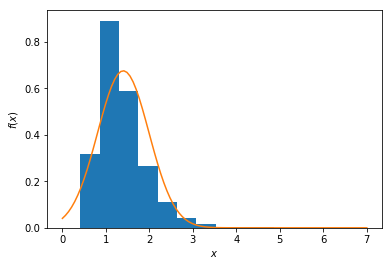

In [294]:
n = 10 # Объем выборки
sampleMean = [] # Массив выборочных средних
for i in range(k):
    f_sample = f_rv.rvs(n)
    sampleMean.append(np.mean(f_sample))
plt.hist(sampleMean, normed=True, label='fraction of samples') # Параметр bins - число столбцов
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
n_mean = mean # Оценка среднего теоретического нормального распределения, к которому приближается распределение выборочных средних
n_std = std / n ** (1/2) # Оценка стандартного отклонения теоретического нормального распределения, к которому приближается распределение выборочных средних
norm_rv = stats.norm(n_mean, n_std)
norm_pdf = norm_rv.pdf(x)
plt.plot(x, norm_pdf, label='normal distribution')

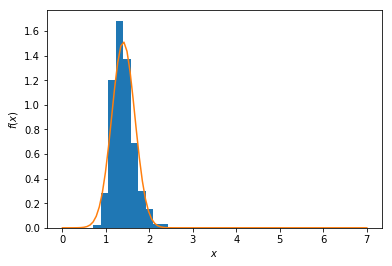

In [295]:
n = 50 # Объем выборки
sampleMean = [] # Массив выборочных средних
for i in range(k):
    f_sample = f_rv.rvs(n)
    sampleMean.append(np.mean(f_sample))
plt.hist(sampleMean, normed=True, label='fraction of samples') # Параметр bins - число столбцов
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
n_mean = mean # Оценка среднего теоретического нормального распределения, к которому приближается распределение выборочных средних
n_std = std / n ** (1/2) # Оценка стандартного отклонения теоретического нормального распределения, к которому приближается распределение выборочных средних
norm_rv = stats.norm(n_mean, n_std)
norm_pdf = norm_rv.pdf(x)
plt.plot(x, norm_pdf, label='normal distribution')

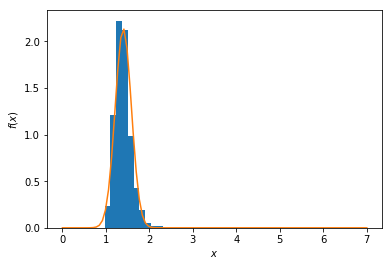

In [296]:
n = 100 # Объем выборки
sampleMean = [] # Массив выборочных средних
for i in range(k):
    f_sample = f_rv.rvs(n)
    sampleMean.append(np.mean(f_sample))
plt.hist(sampleMean, normed=True, label='fraction of samples') # Параметр bins - число столбцов
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
n_mean = mean # Среднее теоретического нормального распределения, к которому приближается распределение выборочных средних
n_std = std / n ** (1/2) # Стандартное отклонение теоретического нормального распределения, к которому приближается распределение выборочных средних
norm_rv = stats.norm(n_mean, n_std)
norm_pdf = norm_rv.pdf(x)
plt.plot(x, norm_pdf, label='normal distribution')

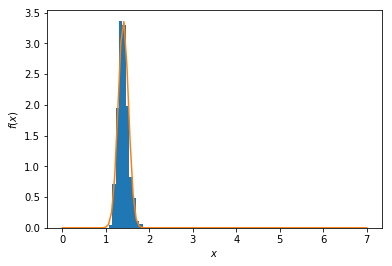

In [297]:
n = 250 # Объем выборки
sampleMean = [] # Массив выборочных средних
for i in range(k):
    f_sample = f_rv.rvs(n)
    sampleMean.append(np.mean(f_sample))
plt.hist(sampleMean, normed=True, label='fraction of samples') # Параметр bins - число столбцов
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
n_mean = mean # Оценка среднего теоретического нормального распределения, к которому приближается распределение выборочных средних
n_std = std / n ** (1/2) # Оценка стандартного отклонения теоретического нормального распределения, к которому приближается распределение выборочных средних
norm_rv = stats.norm(n_mean, n_std)
norm_pdf = norm_rv.pdf(x)
plt.plot(x, norm_pdf, label='normal distribution')

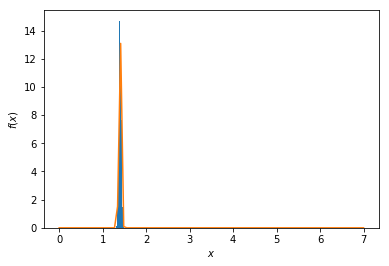

In [299]:
n = 5000 # Объем выборки
sampleMean = [] # Массив выборочных средних
for i in range(k):
    f_sample = f_rv.rvs(n)
    sampleMean.append(np.mean(f_sample))
plt.hist(sampleMean, normed=True, label='fraction of samples') # Параметр bins - число столбцов
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
n_mean = mean # Оценка среднего теоретического нормального распределения, к которому приближается распределение выборочных средних
n_std = std / n ** (1/2) # Оценка стандартного отклонения теоретического нормального распределения, к которому приближается распределение выборочных средних
norm_rv = stats.norm(n_mean, n_std)
norm_pdf = norm_rv.pdf(x)
plt.plot(x, norm_pdf, label='normal distribution')

Сравниваем средние и стандартные отклонения теоретического распределения и получившейся выборки средних

In [302]:
(n_mean, np.mean(sampleMean)), (n_std, np.std(sampleMean))

((1.4, 1.4004417535870417), (0.026398653164297774, 0.026532066716697073))

<b>Выводы.</b>

С ростом n распределение выборочных средних все больше приближается к нормальному с параметрами, равными среднему теоретического распределения и стандартному отклонению, равному стандартному отклонению теоретического распределения, деленному на корень из объема выборки. /Помимо построенных графиков специально для проверки посчитали./

С ростом n за счет более точно посчитанных средних значений выборок точность полученных результатов увеличивается.

Нормальное  распределение, в свою очередь, аппроксимирует распределение выборочных средних заданного распределения /в данном случае - распределения Фишера/. 